In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, explained_variance_score

In [90]:
data = pd.read_csv('/Users/ilchenkoslava/PycharmProjects/Upwork/MLSN/mlsn_property_data_new.csv')

In [91]:
data.head().T

,0,1,2,3,4
адрес,ул. Багратиона 31,ул. Багратиона 33,ул. Малиновского 23,ул. Красный Путь 143 к3,ул. Звездова 127
этаж,9/17,16/17,6/10,6/14,6/14
площадь общая,31 м²,28.1 м²,35 м²,53.3 м²,28.4 м²
площадь жилая,не указано,не указано,не указано,не указано,не указано
площадь кухни,не указано,не указано,не указано,не указано,не указано
планировка,студия,студия,студия,изолированные комнаты,изолированные комнаты
санузел,совмещенный,совмещенный,раздельный,совмещенный,совмещенный
балкон,лоджия,лоджия,балкон,лоджия,лоджия
состояние/ремонт,евроремонт,евроремонт,ремонт от застройщика,черновая отделка,черновая отделка
покрытие пола,ламинат,не указано,линолеум,без покрытия,без покрытия


### Редактирование исходных данных

In [92]:
data.columns

Index(['адрес', ' этаж', ' площадь общая', ' площадь жилая', ' площадь кухни',
       ' планировка', ' санузел', ' балкон', ' состояние/ремонт',
       ' покрытие пола', ' материал окон', ' входная дверь', ' вид из окон',
       ' угловая', ' домофон', ' счетчики воды', ' тип дома', ' материал дома',
       ' новостройка', ' срок сдачи', ' высота потолка', ' интернет', ' лифт',
       ' мусоропровод', ' парковка', ' рейтинг', ' экология',
       ' инфраструктура', ' безопасность', ' социальное восприятие',
       ' уровень комфорта', ' транспортная доступность', ' цена'],
      dtype='object')

In [93]:
data.columns = data.apply(lambda x: x.name.strip())

In [94]:
data.shape

(1000, 33)

In [95]:
data.insert(2, 'этажность', '-')
data['этажность'] = data['этаж'].apply(lambda x: x.split('/')[-1])
data['этаж'] = data['этаж'].apply(lambda x: x.split('/')[0])

In [96]:
data['цена'] = data['цена'].apply(lambda x: x.replace(' ₽', '').replace(' ', ''))
data.drop(list(data[data['адрес'] == 'адрес'].index), axis=0, inplace=True)

In [97]:
data['площадь общая'] = data['площадь общая'].apply(lambda x: x.replace('\xa0м²', ''))
data['площадь жилая'] = data['площадь жилая'].apply(lambda x: x.replace('\xa0м²', ''))
data['площадь кухни'] = data['площадь кухни'].apply(lambda x: x.replace('\xa0м²', ''))

In [98]:
for f in data.columns:
    data[f] = data[f].str.strip()
    
for f in data.columns[list(data.columns).index('рейтинг'):list(data.columns).index('цена')]:
    data.drop(list(data[data[f] == '-'].index), axis=0, inplace=True)
    data.drop(list(data[data[f] == '0.0'].index), axis=0, inplace=True)

In [99]:
data.head().T

,0,1,3,4,5
адрес,ул. Багратиона 31,ул. Багратиона 33,ул. Красный Путь 143 к3,ул. Звездова 127,ул. Звездова 127
этаж,9,16,6,6,6
этажность,17,17,14,14,14
площадь общая,31,28.1,53.3,28.4,34.8
площадь жилая,не указано,не указано,не указано,не указано,не указано
площадь кухни,не указано,не указано,не указано,не указано,не указано
планировка,студия,студия,изолированные комнаты,изолированные комнаты,изолированные комнаты
санузел,совмещенный,совмещенный,совмещенный,совмещенный,совмещенный
балкон,лоджия,лоджия,лоджия,лоджия,балкон
состояние/ремонт,евроремонт,евроремонт,черновая отделка,черновая отделка,черновая отделка


In [100]:
for d in list(data.columns[6:-8]):
    print(data[d].value_counts())
    print("\n")

не указано                323
изолированные комнаты     242
свободная планировка      117
студия                     63
смежно-изолир. комнаты     11
смежные комнаты             3
Name: планировка, dtype: int64


совмещенный    582
не указано     125
раздельный      52
Name: санузел, dtype: int64


лоджия                371
балкон                269
нет                    86
2 лоджии               21
2 балкона               6
балкон и лоджия         5
2 балкона и лоджия      1
Name: балкон, dtype: int64


черновая отделка                199
хорошее состояние               145
отличное состояние              129
чистовая отделка                107
не указано                       54
евроремонт                       28
косметический ремонт             24
удовлетворительное состояние     22
ремонт от застройщика            22
дизайнерский ремонт              15
требует ремонта                  14
Name: состояние/ремонт, dtype: int64


не указано       360
линолеум         159
без покрытия

Исходя из полученных данных, ниже были выбраны следующие категориальные признаки. 
Выбраны они были в зависимости от количества пропусков (т.е. значение признака = 'не указано'). 

In [101]:
columns = ['балкон', 'санузел', 'состояние/ремонт', 'материал дома', 'новостройка']

In [102]:
new_data = data

In [103]:
for col in columns:
    new_data.drop(list(new_data['не указано' == new_data[col]].index), inplace=True)

In [104]:
new_data.shape

(630, 34)

In [105]:
features = ['этаж', 'этажность', 'площадь общая', 'площадь жилая', 'площадь кухни',
            'балкон', 'санузел', 'состояние/ремонт', 'материал дома', 'новостройка', 
           'рейтинг', 'экология', 'инфраструктура', 'безопасность', 'социальное восприятие',
           'уровень комфорта', 'транспортная доступность', 'цена']

In [106]:
new_data = new_data[features]

In [107]:
new_data = new_data.apply(pd.to_numeric, errors='ignore')

Также выкинем из датасета следующие площади, так как в них много пропусков.

In [108]:
new_data.drop(['площадь жилая', 'площадь кухни'], axis=1, inplace=True)

In [109]:
new_data.dtypes

этаж                          int64
этажность                     int64
площадь общая               float64
балкон                       object
санузел                      object
состояние/ремонт             object
материал дома                object
новостройка                  object
рейтинг                     float64
экология                    float64
инфраструктура              float64
безопасность                float64
социальное восприятие       float64
уровень комфорта            float64
транспортная доступность    float64
цена                          int64
dtype: object

Теперь закодируем категориальные признаки.

In [110]:
label_encoder = LabelEncoder()

for label in columns:
    new_data[label] = label_encoder.fit_transform(new_data[label])

В итоге обработанный датасет выглядит следующим образом:

In [111]:
new_data.head()

,этаж,этажность,площадь общая,балкон,санузел,состояние/ремонт,материал дома,новостройка,рейтинг,экология,инфраструктура,безопасность,социальное восприятие,уровень комфорта,транспортная доступность,цена
0,9,17,31.0,5,1,1,1,1,3.0,2.7,3.2,2.3,2.5,3.4,2.0,1577000
1,16,17,28.1,5,1,1,1,1,3.0,2.7,3.2,2.3,2.5,3.4,2.0,1642000
3,6,14,53.3,5,1,8,1,0,3.7,2.7,3.3,4.0,4.2,3.8,3.0,2400000
4,6,14,28.4,5,1,8,1,0,2.7,2.5,2.6,2.6,2.7,2.8,3.0,1136000
5,6,14,34.8,3,1,8,1,0,2.7,2.5,2.6,2.6,2.7,2.8,3.0,1325000


In [112]:
new_data.describe()

,этаж,этажность,площадь общая,балкон,санузел,состояние/ремонт,материал дома,новостройка,рейтинг,экология,инфраструктура,безопасность,социальное восприятие,уровень комфорта,транспортная доступность,цена
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,6.300000e+02
mean,8.125397,11.371429,38.441905,4.287302,0.919048,6.101587,2.200000,0.580952,3.107143,2.753016,2.929048,3.150952,3.060476,3.286825,1.398889,1.736795e+06
std,2.814649,3.210447,6.420705,1.219214,0.272979,2.620543,1.247446,0.493795,0.683298,0.176385,0.526437,0.662719,0.735783,0.934756,0.599482,4.742189e+05
min,5.000000,5.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,2.200000,1.600000,1.600000,1.300000,0.400000,1.000000,5.490000e+05
25%,6.000000,9.000000,35.425000,3.000000,1.000000,3.000000,1.000000,0.000000,3.000000,2.600000,2.700000,2.800000,2.500000,3.100000,1.000000,1.450000e+06
50%,8.000000,10.000000,39.400000,5.000000,1.000000,7.000000,2.000000,1.000000,3.300000,2.800000,3.000000,3.500000,3.300000,3.600000,1.000000,1.722500e+06
75%,9.000000,14.000000,43.000000,5.000000,1.000000,8.000000,4.000000,1.000000,3.600000,2.900000,3.400000,3.600000,3.500000,3.700000,2.000000,1.990000e+06
max,16.000000,19.000000,74.000000,6.000000,1.000000,9.000000,6.000000,1.000000,3.800000,3.000000,3.500000,4.000000,4.200000,4.300000,5.000000,3.350000e+06


In [113]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 999
Data columns (total 16 columns):
этаж                        630 non-null int64
этажность                   630 non-null int64
площадь общая               630 non-null float64
балкон                      630 non-null int64
санузел                     630 non-null int64
состояние/ремонт            630 non-null int64
материал дома               630 non-null int64
новостройка                 630 non-null int64
рейтинг                     630 non-null float64
экология                    630 non-null float64
инфраструктура              630 non-null float64
безопасность                630 non-null float64
социальное восприятие       630 non-null float64
уровень комфорта            630 non-null float64
транспортная доступность    630 non-null float64
цена                        630 non-null int64
dtypes: float64(8), int64(8)
memory usage: 83.7 KB


In [114]:
new_data.drop(list(new_data[new_data['этаж'] == 0].index), inplace=True)
new_data.drop(list(new_data[new_data['этажность'] == 0].index), inplace=True)

### Обучение данных

#### Linear regression

In [115]:
y = new_data['цена']
X = new_data.drop('цена', axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((441, 15), (189, 15), (441,), (189,))

In [116]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout)))
print("Score: %.3f" % explained_variance_score(y_holdout, linreg.predict(X_holdout)))

Mean squared error (test): 57277889569.424
Score: 0.701


In [118]:
linreg_coef = pd.DataFrame(linreg.coef_, new_data.drop('цена', axis=1).columns, columns=['coef'])
linreg_coef.sort_values(by=['coef'], ascending=False)

,coef
рейтинг,731478.372326
новостройка,363389.173797
социальное восприятие,172023.173641
площадь общая,47405.139667
санузел,45529.081182
экология,21572.702823
этажность,2910.767232
этаж,-2278.229516
балкон,-22970.466874
транспортная доступность,-39288.808132


Самым влиятельным признаком в модели линейной регрессии оказался признак <b>"рейтинг"</b>

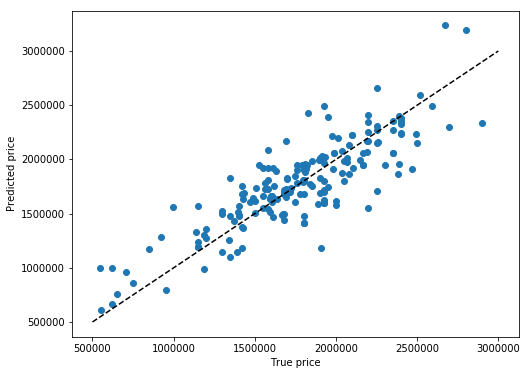

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(y_holdout, linreg.predict(X_holdout))
plt.plot([500000, 3000000], [500000, 3000000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()

#### Gradient boosting regressor

Text(0, 0.5, 'Predicted price')

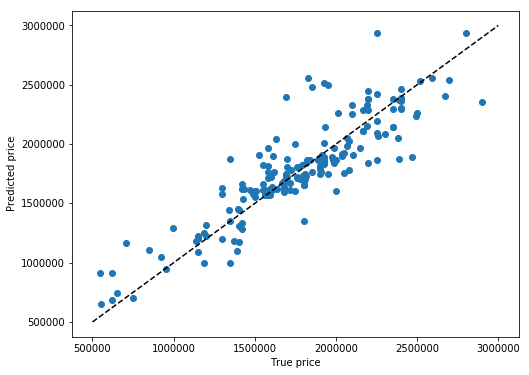

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state=17)
clf.fit(X_train, y_train)

predicted = clf.predict(X_holdout)
expected = y_holdout

plt.figure(figsize=(8, 6))
plt.scatter(expected, predicted)
plt.plot([500000, 3000000], [500000, 3000000], '--k')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('True price')
plt.ylabel('Predicted price')

In [121]:
print("Mean squared error: %.3f" % mean_squared_error(expected, predicted))
print("Score: %.3f" % explained_variance_score(expected, predicted))

Mean squared error: 44622369358.139
Score: 0.767


In [130]:
clf_coef = pd.DataFrame(clf.feature_importances_, new_data.drop('цена', axis=1).columns, columns=['coef'])
clf_coef.sort_values(by=['coef'], ascending=False)

,coef
площадь общая,0.585400
состояние/ремонт,0.128723
новостройка,0.092901
материал дома,0.058857
рейтинг,0.033830
безопасность,0.025006
социальное восприятие,0.015128
уровень комфорта,0.013767
инфраструктура,0.012288
экология,0.011974


Самым влиятельным признаком в модели градиентного бустинга оказался признак <b>"площадь общая"</b>

In [129]:
print(new_data[new_data['цена'] == new_data['цена'].max()]['цена'])
print(new_data[new_data['цена'] == new_data['цена'].min()]['цена'])

972    3350000
Name: цена, dtype: int64
973    549000
Name: цена, dtype: int64


In [123]:
data[data['цена'].astype('int') == data['цена'].astype('int').max()]

,адрес,этаж,этажность,площадь общая,площадь жилая,площадь кухни,планировка,санузел,балкон,состояние/ремонт,...,мусоропровод,парковка,рейтинг,экология,инфраструктура,безопасность,социальное восприятие,уровень комфорта,транспортная доступность,цена
972,ул. 70 лет Октября 10 к3,5,9,46,20,12,смежно-изолир. комнаты,совмещенный,балкон,хорошее состояние,...,не указано,не указано,3.8,2.6,3.5,3.7,3.8,4.3,2.0,3350000
